In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [199]:
#READ DATA
df=pd.read_csv(r"C:\Pravin\Upgrad\ML\LinearRegressionAssignment\day.csv")

In [200]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [201]:
#See the columns in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [202]:
# get the basic idea of the data like percentile, mean and std of the numerical values of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [203]:
# check the null values
count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [204]:
#check the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [205]:
#dropping columns: 
# 1. Instant - as it is the index column, 
# 2. casual and registered because their total is present in the cnt column
# 3. dteday as it is a date for each day and different for each record
df.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [206]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [207]:
# Season is a categorical data hence we substitue season values with their names
df['season'].replace([0, 1, 2, 3],['spring', 'summer','fall','winter'], inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,summer,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,summer,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,summer,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,summer,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,summer,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,summer,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,summer,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,summer,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,summer,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,summer,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [208]:
# weathersit is a categorical data hence we substitue weathersit values with their names
df['weathersit'].replace([1, 2, 3, 4],['Clear_Few Clouds', 'Mist_cloudys','Light rain_Light snow_Thunderstorm','Heavy Rain_Ice Pallets_Thunderstorm_Mist'], inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,summer,0,1,0,6,0,Mist_cloudys,14.110847,18.18125,80.5833,10.749882,985
1,summer,0,1,0,0,0,Mist_cloudys,14.902598,17.68695,69.6087,16.652113,801
2,summer,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,summer,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,summer,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,summer,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,summer,0,1,0,5,1,Mist_cloudys,8.057402,10.44195,49.8696,11.304642,1510
7,summer,0,1,0,6,0,Mist_cloudys,6.765000,8.11270,53.5833,17.875868,959
8,summer,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,summer,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [209]:
# weekday is a categorical data hence we substitue weekday values with their names
df['weekday'].replace([0,1, 2, 3,4 ,5, 6],['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,summer,0,1,0,Saturday,0,Mist_cloudys,14.110847,18.18125,80.5833,10.749882,985
1,summer,0,1,0,Sunday,0,Mist_cloudys,14.902598,17.68695,69.6087,16.652113,801
2,summer,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,summer,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,summer,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,summer,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,summer,0,1,0,Friday,1,Mist_cloudys,8.057402,10.44195,49.8696,11.304642,1510
7,summer,0,1,0,Saturday,0,Mist_cloudys,6.765000,8.11270,53.5833,17.875868,959
8,summer,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,summer,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


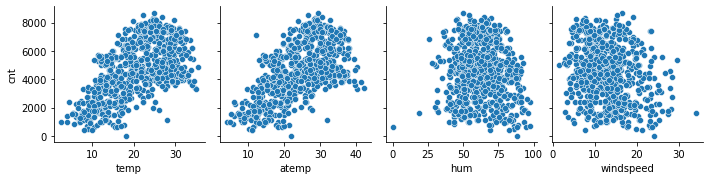

In [210]:
# Analyse the pair plots for the vaiables temp , atemp, hum ,windspeed , cnt     
sns.pairplot(data=df, x_vars=['temp','atemp','hum','windspeed'], y_vars="cnt")

plt.show()

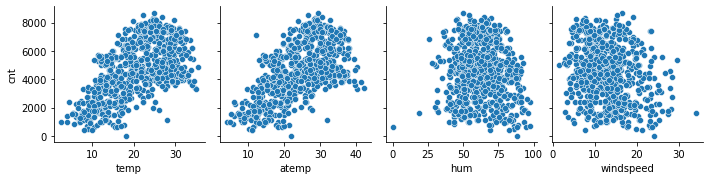

In [211]:
sns.pairplot(data=df, x_vars=['temp','atemp','hum','windspeed'], y_vars="cnt")

In [212]:
#lets analyse the correlatons
df.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


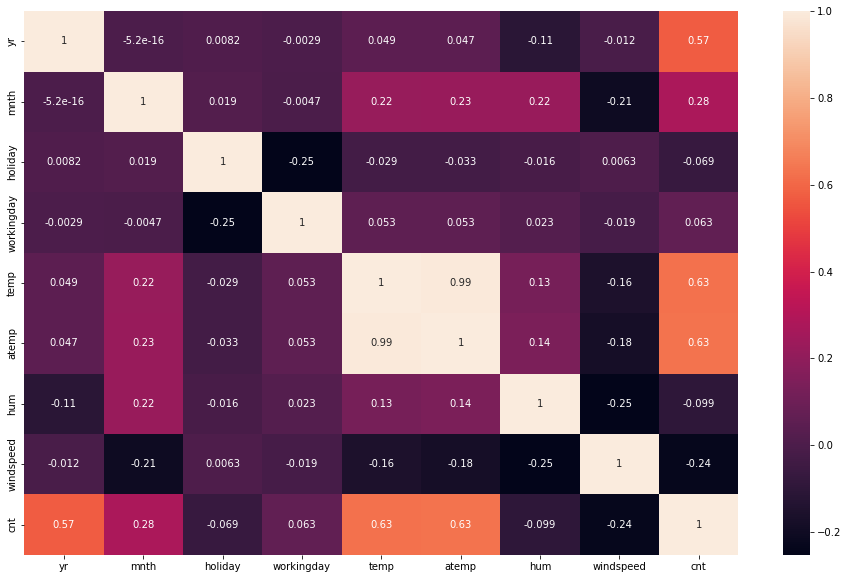

In [213]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [214]:
#looking at the above corellations we see that the temp is very highly corelated to the atemp which is almost 1 (i.e. 0.99)
#hence out of them we can take only one, hence decide to drop temp from the data
df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,summer,0,1,0,Saturday,0,Mist_cloudys,18.18125,80.5833,10.749882,985
1,summer,0,1,0,Sunday,0,Mist_cloudys,17.68695,69.6087,16.652113,801
2,summer,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,summer,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,summer,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


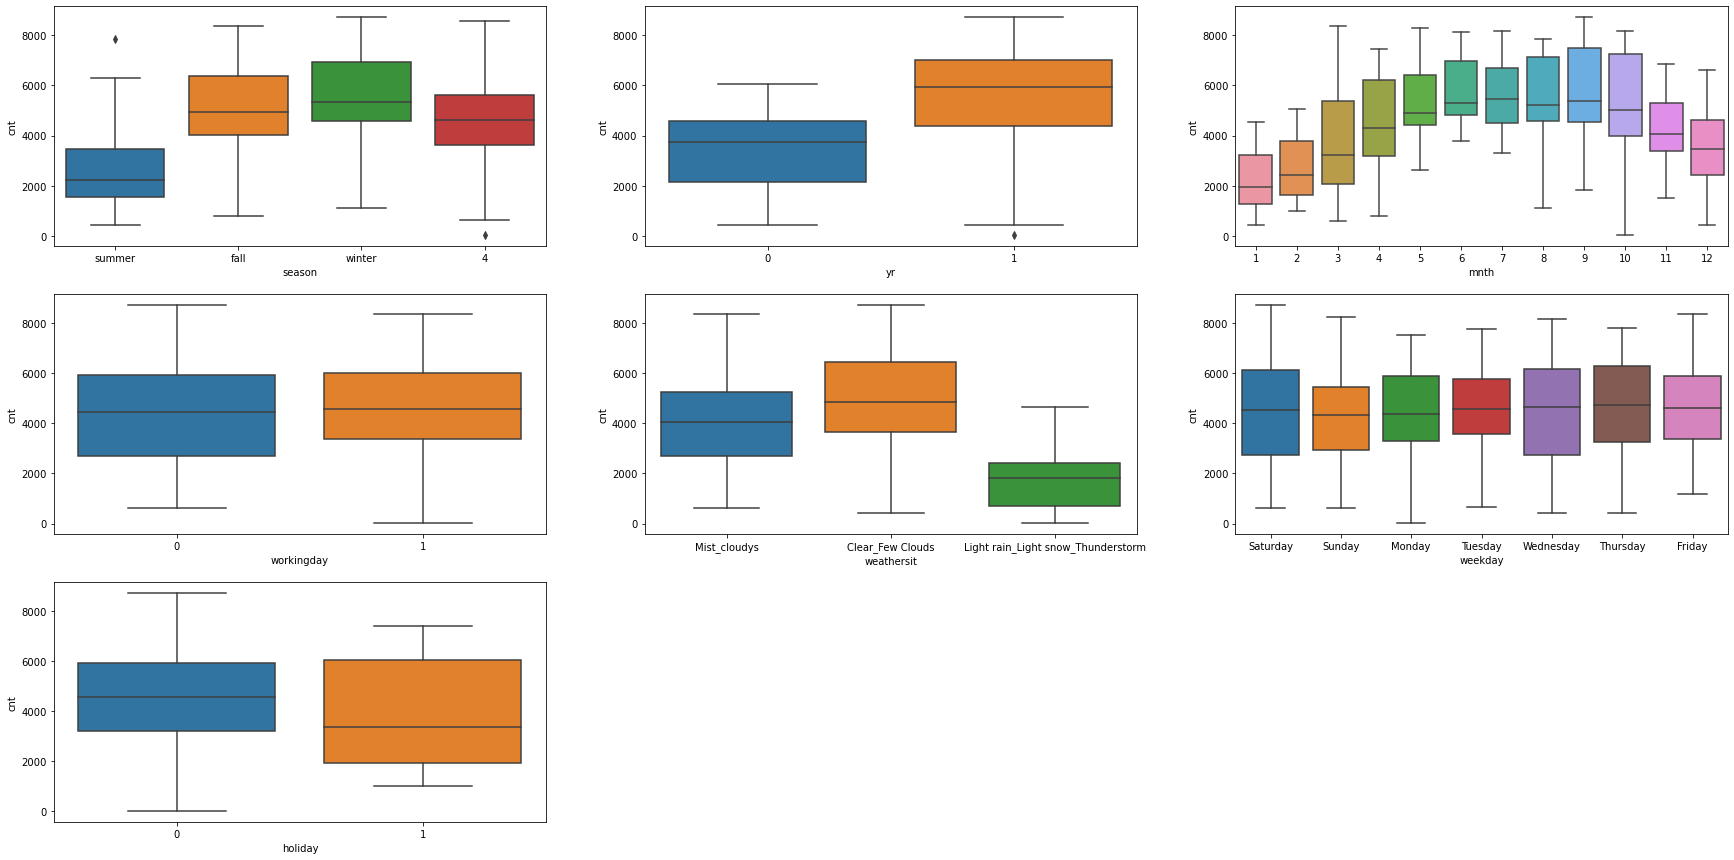

In [215]:
#consider visualization using the categorical Variables : season,yr,mnth,workingday,weathersit,weekday,holiday
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()


In [216]:
#Get the dummy variables our of the categorical data

Season_varirations=pd.get_dummies(df['season'],drop_first=True)
Weather_variation=pd.get_dummies(df['weathersit'],drop_first=True)
Days_in_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [217]:
df=pd.concat([df,Season_varirations],axis=1)
df=pd.concat([df,Weather_variation],axis=1)
df=pd.concat([df,Days_in_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  fall                                730 non-n

In [218]:
#deleting the sources of the derived columns i.e season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#Lets split the data into training and testing data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_bike, df_test_bike = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [220]:
df_train_bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [221]:
df_train_bike.shape

(510, 29)

In [222]:
df_train_bike.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                     'fall',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                             'Mist_cloudys',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [223]:
# importe MinMax scaler from preprocessing module of sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [224]:


# performing scaling on the numericals variables 
num_vars=['atemp','hum','windspeed','cnt']
df_train_bike[num_vars] = scaler.fit_transform(df_train_bike[num_vars])
df_train_bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [225]:
# lets see the description of the data
df_train_bike.describe()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.245098,0.243137,0.262745,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.430568,0.429398,0.440557,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
#create x and y
y_train  = df_train_bike.pop('cnt')
X_train  = df_train_bike

print(y_train)
print(X_train)

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64
     yr  holiday  workingday     atemp       hum  windspeed  fall  summer  \
653   1        0           1  0.501133  0.575354   0.300794     0       0   
576   1        0           1  0.766351  0.725633   0.264686     0       0   
426   1        0           0  0.438975  0.640189   0.255342     0       1   
728   1        0           0  0.200348  0.498067   0.663106     0       1   
482   1        0           0  0.391735  0.504508   0.188475     1       0   
..   ..      ...         ...       ...       ...        ...   ...     ...   
526   1        0           1  0.762183  0.605840   0.355596     1       0   
578   1        0           1  0.824359  0.679690   0.187140     0       0   
53    0        0           1  0.218747  0.435939   0.111379     0       1   
350   0        

In [227]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,fall,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [228]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [229]:
#import RFE library for feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [230]:
#USING RFE APPROACH FOR FEATURE SELECTION

#use the REF approach for feature selection
lm = LinearRegression()
lm.fit(X_train, y_train)

# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL
# Lets start with 15 var
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [231]:
#creatE a list of features selected by RFE 
list(zip(X_train, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudys', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 (2, False, 7),
 (3, False, 3),
 (4, False, 5),
 (5, True, 1),
 (6, False, 4),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 14),
 (12, False, 13)]

In [232]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                             'Mist_cloudys',
                                 'Saturday',
                                          5,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [233]:
# feature which are chosen by RFE during feature selection( so un-supported columns)

X_train.columns[~rfe.support_]

Index([     'fall',    'Monday',    'Sunday',  'Thursday',   'Tuesday',
       'Wednesday',           2,           3,           4,           6,
                 7,          11,          12],
      dtype='object')

In [234]:
# Creating new train dataframe with features selected with RFE
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudys,Saturday,5,8,9,10
653,1,0,1,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [235]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                             'Mist_cloudys',
                                 'Saturday',
                                          5,
                                          8,
                                          9,
                                         10],
      dtype='object')

# Model 1

In [236]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_rfe1  = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_rfe1 ).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.2
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          1.09e-188
Time:                        02:12:40   Log-Likelihood:                 513.49
No. Observations:                 510   AIC:                            -995.0
Df Residuals:                     494   BIC:                            -927.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3371      0.031     10.769      0.000       0.276       0.399
yr                                     0.2323      0.008     28.695      0.000       0.216       0.248
holiday                               -0.0478      0.027     -1.759      0.079      -0.101       0.006
workingday                             0.0446      0.012      3.826      0.000       0.022       0.068
atemp                                  0.4629      0.033     14.001      0.000       0.398       0.528
hum                                   -0.1592      0.038     -4.221      0.000      -0.233      -0.085
windspeed                             -0.1685      0.025     -6.613      0.000      -0.219      -0.118
summer                                -0.1345      0.012    -10.993      0.000      -0.159      -0.110
winter                                -0.0726      0.017     -4.379      0.000      -0.105      -0.040
Light rain_Light snow_Thunderstorm    -0.2485      0.027     -9.364      0.000      -0.301      -0.196
Mist_cloudys                          -0.0619      0.010     -5.916      0.000      -0.082      -0.041
Saturday                               0.0540      0.015      3.676      0.000       0.025       0.083
5                                      0.0172      0.016      1.043      0.298      -0.015       0.050
8                                      0.0548      0.018      3.130      0.002       0.020       0.089
9                                      0.1195      0.017      6.926      0.000       0.086       0.153
10                                     0.0617      0.016      3.944      0.000       0.031       0.092
==============================================================================
Omnibus:                       76.332   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.358
Skew:                          -0.707   Prob(JB):                     7.03e-50
Kurtosis:                       5.942   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                             'Mist_cloudys',
                                 'Saturday',
                                          5,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [238]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,19.02
3,atemp,18.66
2,workingday,5.15
7,winter,4.54
5,windspeed,4.16
9,Mist_cloudys,2.16
0,yr,2.06
6,summer,2.02
10,Saturday,1.94
12,8,1.86


# Model 2

In [239]:
#COLUMN hum have very high VIF (19.02) so we drop it
X_train_rfe2=X_train_rfe.drop(['hum'],axis=1)

In [240]:
import statsmodels.api as sm  
X_train_lm2  = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lm1 = sm.OLS(y_train,X_train_lm2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          4.79e-186
Time:                        02:12:46   Log-Likelihood:                 504.45
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     495   BIC:                            -915.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [241]:
#lets determing the VIS for the features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
3,atemp,10.34
2,workingday,4.75
6,winter,4.23
4,windspeed,4.13
0,yr,2.06
9,Saturday,1.85
11,8,1.85
5,summer,1.73
8,Mist_cloudys,1.55
12,9,1.47


# Model 3

In [242]:
#COLUMN atemp has very high VIF so we are dropping it
X_train_rfe3=X_train_rfe2.drop(['atemp'],axis=1)
 
X_train_lm3  = sm.add_constant(X_train_rfe3)
lm2 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              452.6
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                   1.24e-265
Time:                        02:12:48   Log-Likelihood:                          222.47
No. Observations:                 510   AIC:                                     -418.9
Df Residuals:                     497   BIC:                                     -363.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [243]:
#lets determing the VIS for the features
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.62
3,windspeed,3.56
5,winter,2.69
0,yr,1.90
10,8,1.85
4,summer,1.66
8,Saturday,1.61
7,Mist_cloudys,1.55
11,9,1.47
9,5,1.22


# Model 4

In [244]:
#COLUMN month 8 i.e. august has a high VIF se droping it
X_train_rfe4=X_train_rfe3.drop([8],axis=1)


In [247]:
X_train_lm4 = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          5.21e-155
Time:                        02:13:23   Log-Likelihood:                 425.23
No. Observations:                 510   AIC:                            -824.5
Df Residuals:                     497   BIC:                            -769.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [248]:
#lets determing the VIS for the features
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,3.61
3,windspeed,3.56
0,yr,1.90
5,winter,1.76
4,summer,1.66
8,Saturday,1.61
7,Mist_cloudys,1.53
10,9,1.27
9,5,1.21
11,10,1.21


In [249]:
X_train_rfe4

,yr,holiday,workingday,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudys,Saturday,5,9,10
653,1,0,1,0.300794,0,0,0,0,0,0,0,1
576,1,0,1,0.264686,0,1,0,0,0,0,0,0
426,1,0,0,0.255342,1,0,0,1,1,0,0,0
728,1,0,0,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.188475,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.355596,0,0,0,1,0,0,0,0
578,1,0,1,0.187140,0,1,0,0,0,0,0,0
53,0,0,1,0.111379,1,0,0,0,0,0,0,0
350,0,0,0,0.431816,0,0,0,1,1,0,0,0


# Model 5

In [ ]:
# lr6 is a good model with acceptable p values and VIF

In [250]:
#Predict values
y_train_pred = lm4.predict(X_train_lm4)


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [252]:
#CALCULATING RESIDUALS

res=y_train - y_train_pred

Text(0.5, 0, 'Errors')

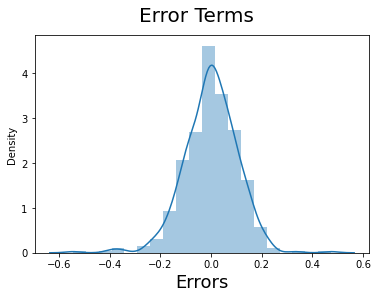

In [253]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [254]:
#Checking columns
X_train_lm4.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                               'workingday',
                                'windspeed',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                             'Mist_cloudys',
                                 'Saturday',
                                          5,
                                          9,
                                         10],
      dtype='object')

In [255]:
print(X_train_lm4.shape)
print(res.shape)

(510, 13)
(510,)


In [256]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [257]:
#Creating x and y sets

y_test = df.pop('cnt')
X_test = df

In [258]:
X_train_new=X_train_lm4.drop(['const'], axis=1)

In [259]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [260]:
X_test_new.head()

,const,yr,holiday,workingday,windspeed,summer,winter,Light rain_Light snow_Thunderstorm,Mist_cloudys,Saturday,5,9,10
0,1.0,0,0,0,0.284606,1,0,0,1,1,0,0,0
1,1.0,0,0,0,0.466215,1,0,0,1,0,0,0,0
2,1.0,0,0,1,0.465740,1,0,0,0,0,0,0,0
3,1.0,0,0,1,0.284297,1,0,0,0,0,0,0,0
4,1.0,0,0,1,0.339143,1,0,0,0,0,0,0,0


In [261]:
#Making predictions on the chosen model

y_test_pred  = lm4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

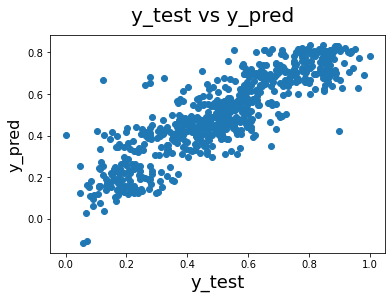

In [262]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Residual Analysis

In [263]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [193]:
#Calculate the r square for test
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 76.52
Train data r^2 : 77.17


In [264]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_lm4.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_lm4.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 75.58
Train data adjusted r^2 : 76.57


# FINAL RESULT COMPARISON:
Test data r^2 :76.52
Train data r^2 : 77.17

Test data adjusted r^2 : 75.58

Train data adjusted r^2 : 76.67

This seems to be a really good model that can very well 'Generalize' various datasets.

# As per our final Model, the below predictor variables influences bike booking :
Year  
workingday
windspeed
summer
winter
Light rain_Light snow_Thunderstorm
Mist_cloudys
Saturday
May
October